In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [2]:
import zipfile
import os

# Define the zip file path and extraction path
zip_file_path = r"C:\Users\HP\Desktop\Teeth DataSet.zip"
extract_path = r"C:\Users\HP\Desktop\Teeth DataSet"

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import os
import shutil

# Paths
test_dir = r"C:\Users\HP\Desktop\Teeth DataSet\Teeth_Dataset\Testing"
selected_test_dir =r"C:\Users\HP\Desktop\Teeth DataSet\Teeth_Dataset\New_Testing"

# Create the new directory if it doesn't exist
if not os.path.exists(selected_test_dir):
    os.makedirs(selected_test_dir)

# List all folders in the test directory
all_folders = sorted([f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))])

# Select the first 7 folders
selected_folders = all_folders[:7]

# Move the selected folders to the new directory
for folder in selected_folders:
    src = os.path.join(test_dir, folder)
    dst = os.path.join(selected_test_dir, folder)
    shutil.copytree(src, dst)

print(f"Selected folders: {selected_folders}")


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HP\\Desktop\\Teeth DataSet\\Teeth_Dataset\\New_Testing\\CaS'

In [4]:
# Define image size and batch size
image_size = (150, 150)  # Example size, adjust as needed
batch_size = 32

# Data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    #fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
   r"C:\Users\HP\Desktop\Teeth DataSet\Teeth_Dataset\Training",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\HP\Desktop\Teeth DataSet\Teeth_Dataset\Validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\HP\Desktop\Teeth DataSet\Teeth_Dataset\New_Testing",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


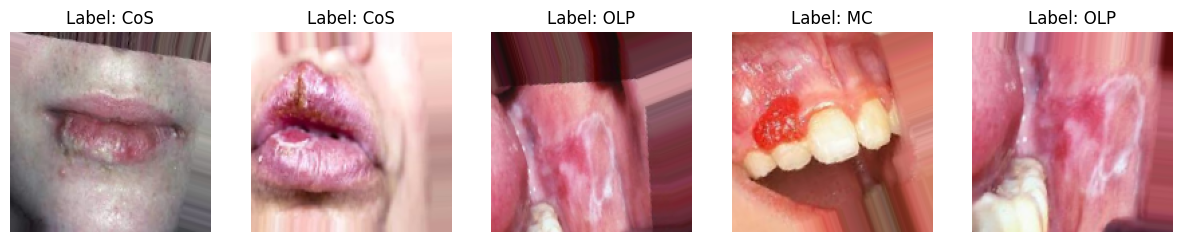

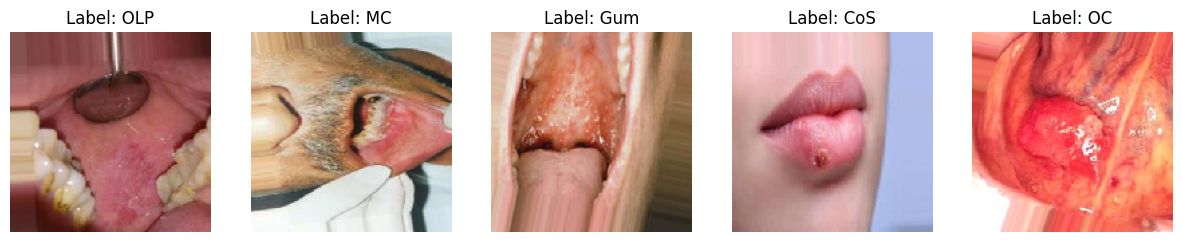

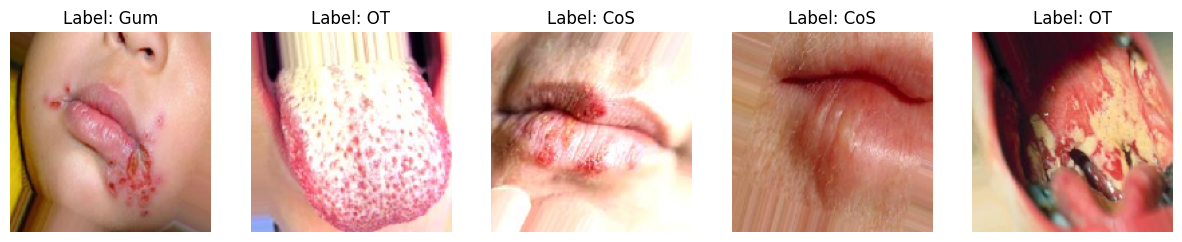

In [5]:
def plot_images(generator, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        image, label = next(generator)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image[0])
        # Get the class index with the highest probability and use it to fetch the label
        predicted_class_index = label[0].argmax()
        predicted_class_label = list(generator.class_indices.keys())[list(generator.class_indices.values()).index(predicted_class_index)]
        plt.title(f"Label: {predicted_class_label}")
        plt.axis('off')
    plt.show()

# Visualize images from each set
plot_images(train_generator)
plot_images(val_generator)
plot_images(test_generator)

In [6]:
#def conv_block(x, filters, num_conv_layers):
#    for _ in range(num_conv_layers):
#        x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
#    x = layers.MaxPooling2D((2, 2))(x)
#    return x

#def vgg16_model(input_shape=(224, 224, 3), num_classes=7):
#    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
#    x = conv_block(inputs, 64, 2)
#    x = conv_block(x, 128, 2)
#    x = conv_block(x, 256, 3)
#    x = conv_block(x, 512, 3)
#    x = conv_block(x, 512, 3)

    # Fully connected layers
#    x = layers.Flatten()(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    outputs = layers.Dense(num_classes, activation='softmax')(x)

#    model = models.Model(inputs, outputs)
#    return model

In [7]:
#model = vgg16_model(input_shape=(150, 150, 3), num_classes=7)

In [8]:
model = models.Sequential([
    # First Convolutional Block
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(7, activation='softmax')  # 7 classes for your teeth classification task
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    42,468,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,089,991 (164.38 MB)

 Trainable params: 43,089,991 (164.38 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,  # Your training data generator
    epochs=100,
    validation_data=val_generator  # Your validation data generator
)

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 536ms/step - accuracy: 0.1484 - loss: 2.0119 - val_accuracy: 0.2335 - val_loss: 1.8473
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.2502 - loss: 1.8550 - val_accuracy: 0.3093 - val_loss: 1.7548
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.3125 - loss: 1.7390 - val_accuracy: 0.3453 - val_loss: 1.6331
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.3297 - loss: 1.7187 - val_accuracy: 0.4222 - val_loss: 1.4886
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.3739 - loss: 1.5881 - val_accuracy: 0.4543 - val_loss: 1.4615
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.4111 - loss: 1.5172 - val_accuracy: 0.5039 - val_loss: 1.3232
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.4397 - loss: 1.4823 - val_accuracy: 0.5360 - val_loss: 1.2657
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.4877 - loss: 1.3940 - val_accuracy

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9687 - loss: 0.0877
Test Accuracy: 0.9640077948570251


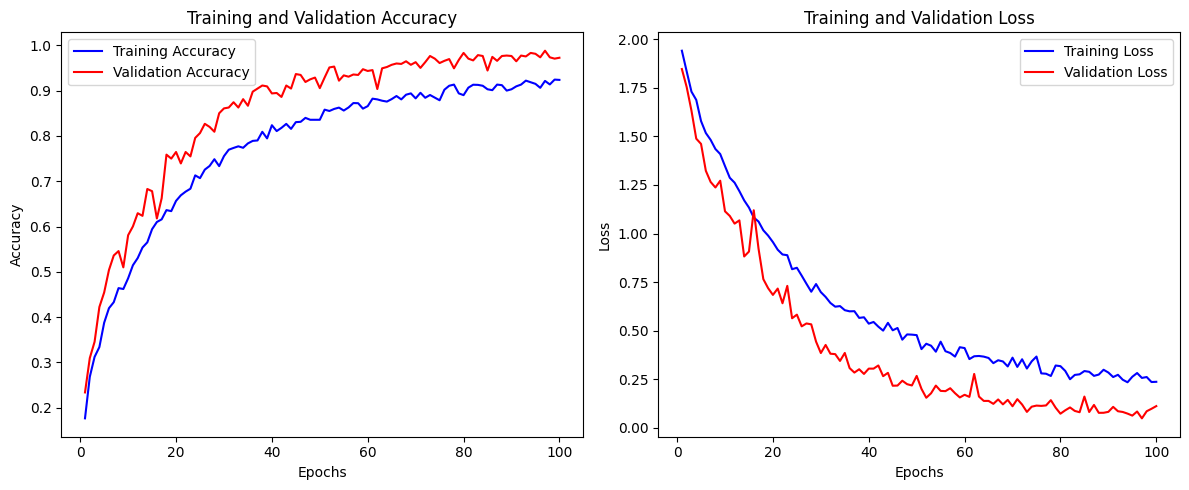

In [16]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation accuracy and loss separately.

    Parameters:
    history: History object returned by model.fit()
    """
    # Extract accuracy and loss data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()
# Plot the training history
plot_training_history(history)